In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
import jax.numpy as jnp
from jax import grad, jit, vmap

In [3]:
@jit
def f(x, y):
    return jnp.exp(-(x**2 + y**2))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Text(0.5, 0, 'z')

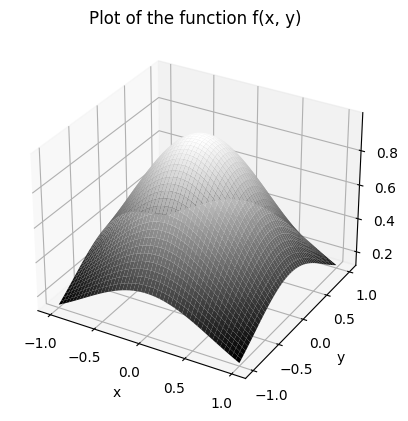

In [4]:
t = jnp.linspace(-1.0, 1.0)
x, y = jnp.meshgrid(t, t)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x, y, f(x, y), cmap="gray")
ax.set_title("Plot of the function f(x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [5]:
fx = jit(grad(f, 0))
fy = jit(grad(f, 1))

In [6]:
print(fx(1., -1.), fy(1., -1.))

-0.27067056 0.27067056


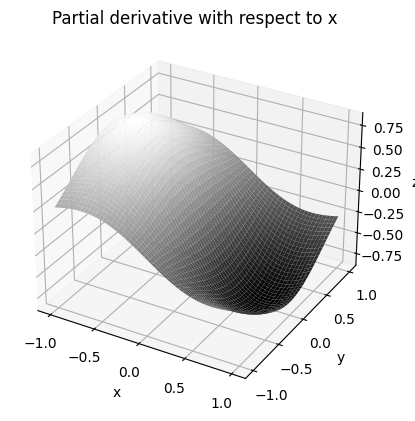

In [7]:
zx = vmap(fx)(x.ravel(), y.ravel()).reshape(x.shape)
figpd = plt.figure()
axpd = figpd.add_subplot(projection="3d")
axpd.plot_surface(x, y, zx, cmap="gray")
axpd.set_title("Partial derivative with respect to x")
axpd.set_xlabel("x")
axpd.set_ylabel("y")
axpd.set_zlabel("z")
plt.show()
